In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
social_record = pd.read_csv("Social Media Data for DSBA.csv")
social_record.head()

,UserID,Taken_product,Yearly_avg_view_on_travel_page,preferred_device,total_likes_on_outstation_checkin_given,yearly_avg_Outstation_checkins,member_in_family,preferred_location_type,Yearly_avg_comment_on_travel_page,total_likes_on_outofstation_checkin_received,week_since_last_outstation_checkin,following_company_page,montly_avg_comment_on_company_page,working_flag,travelling_network_rating,Adult_flag,Daily_Avg_mins_spend_on_traveling_page
0,1000001,Yes,307.0,iOS and Android,38570.0,1,2,Financial,94.0,5993,8,Yes,11,No,1,0,8
1,1000002,No,367.0,iOS,9765.0,1,1,Financial,61.0,5130,1,No,23,Yes,4,1,10
2,1000003,Yes,277.0,iOS and Android,48055.0,1,2,Other,92.0,2090,6,Yes,15,No,2,0,7
3,1000004,No,247.0,iOS,48720.0,1,4,Financial,56.0,2909,1,Yes,11,No,3,0,8
4,1000005,No,202.0,iOS and Android,20685.0,1,1,Medical,40.0,3468,9,No,12,No,4,1,6


In [3]:
social_record.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11760 entries, 0 to 11759
Data columns (total 17 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   UserID                                        11760 non-null  int64  
 1   Taken_product                                 11760 non-null  object 
 2   Yearly_avg_view_on_travel_page                11179 non-null  float64
 3   preferred_device                              11707 non-null  object 
 4   total_likes_on_outstation_checkin_given       11379 non-null  float64
 5   yearly_avg_Outstation_checkins                11685 non-null  object 
 6   member_in_family                              11760 non-null  object 
 7   preferred_location_type                       11729 non-null  object 
 8   Yearly_avg_comment_on_travel_page             11554 non-null  float64
 9   total_likes_on_outofstation_checkin_received  11760 non-null 

In [4]:
social_record.isnull().sum()

UserID                                            0
Taken_product                                     0
Yearly_avg_view_on_travel_page                  581
preferred_device                                 53
total_likes_on_outstation_checkin_given         381
yearly_avg_Outstation_checkins                   75
member_in_family                                  0
preferred_location_type                          31
Yearly_avg_comment_on_travel_page               206
total_likes_on_outofstation_checkin_received      0
week_since_last_outstation_checkin                0
following_company_page                          103
montly_avg_comment_on_company_page                0
working_flag                                      0
travelling_network_rating                         0
Adult_flag                                        0
Daily_Avg_mins_spend_on_traveling_page            0
dtype: int64

In [5]:
social_record_sub = ["member_in_family","preferred_location_type","following_company_page","working_flag","travelling_network_rating","Adult_flag"]

#### Members in Family

In [6]:
social_record["member_in_family"].unique()

array(['2', '1', '4', 'Three', '3', '5', '10'], dtype=object)

In [7]:
## Cleaning the variable
social_record["member_in_family"] = social_record["member_in_family"].replace("Three","3")
social_record["member_in_family"] = social_record["member_in_family"].astype("int")

<AxesSubplot:xlabel='member_in_family', ylabel='count'>

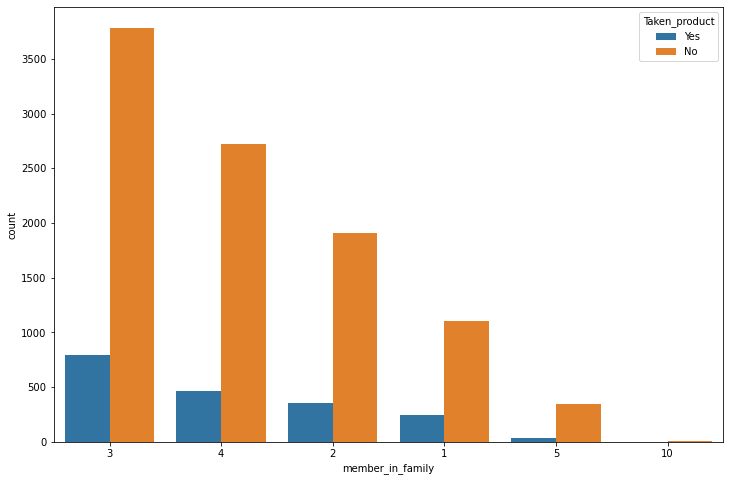

In [8]:
plt.rcParams["figure.figsize"] = (12,8)
sns.countplot(x=social_record["member_in_family"],hue=social_record["Taken_product"],order=social_record["member_in_family"].value_counts().index)

In [9]:
def category_sales(col,data,target):
    sale_location = data.groupby(col).sum()[target]
    percent_sale_location = pd.DataFrame(sale_location)
    percent_sale_location["Total_sale"] = data[col].value_counts()
    percent_sale_location["Market_share"] = percent_sale_location[target]/percent_sale_location["Total_sale"]
    return percent_sale_location

In [10]:
social_record["Taken_product"] = social_record["Taken_product"].replace({"Yes":1,"No":0})

In [11]:
category_sales(col="member_in_family",data=social_record,target="Taken_product")

,Taken_product,Total_sale,Market_share
member_in_family,,,
1,247,1349,0.183099
2,352,2256,0.156028
3,792,4576,0.173077
4,464,3184,0.145729
5,40,384,0.104167
10,1,11,0.090909


In [12]:
social_record["member_in_family"] = social_record["member_in_family"].replace(10,5)

#### Preferred Location Type

In [13]:
## Cleaning the variable
social_record["preferred_location_type"] = social_record["preferred_location_type"].fillna(social_record["preferred_location_type"].mode()[0])

<AxesSubplot:xlabel='count', ylabel='preferred_location_type'>

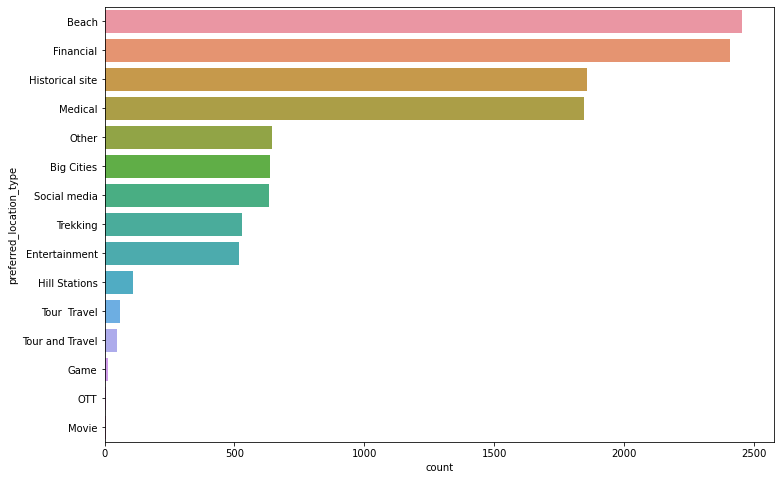

In [14]:
sns.countplot(y=social_record["preferred_location_type"],order = social_record["preferred_location_type"].value_counts().index)

In [15]:
dict_preferred_location = {"Tour  Travel":"Tour and Travel","Game":"Entertainment","Movie":"Entertainment","OTT":"Entertainment","Social media": "Entertainment","Beach":"Tour and Travel","Big Cities":"Tour and Travel","Historical site":"Tour and Travel","Trekking":"Tour and Travel","Hill Stations":"Tour and Travel"}
social_record["preferred_location_type"] = social_record["preferred_location_type"].replace(dict_preferred_location)

<AxesSubplot:xlabel='count', ylabel='preferred_location_type'>

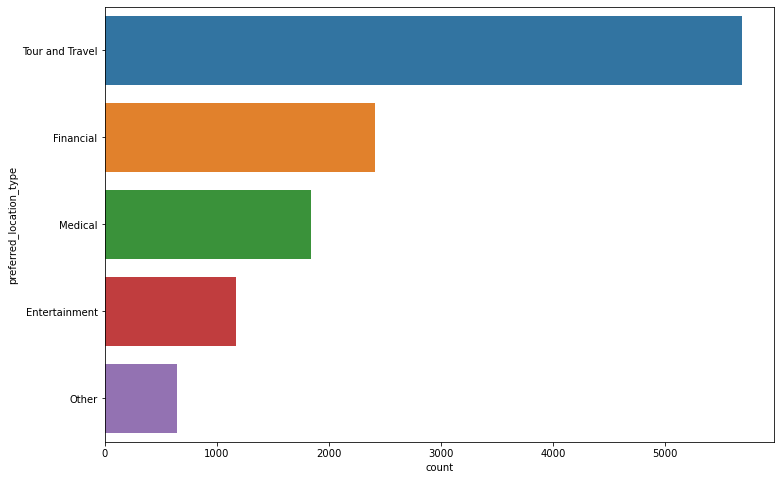

In [16]:
sns.countplot(y=social_record["preferred_location_type"],order = social_record["preferred_location_type"].value_counts().index)

<AxesSubplot:xlabel='count', ylabel='preferred_location_type'>

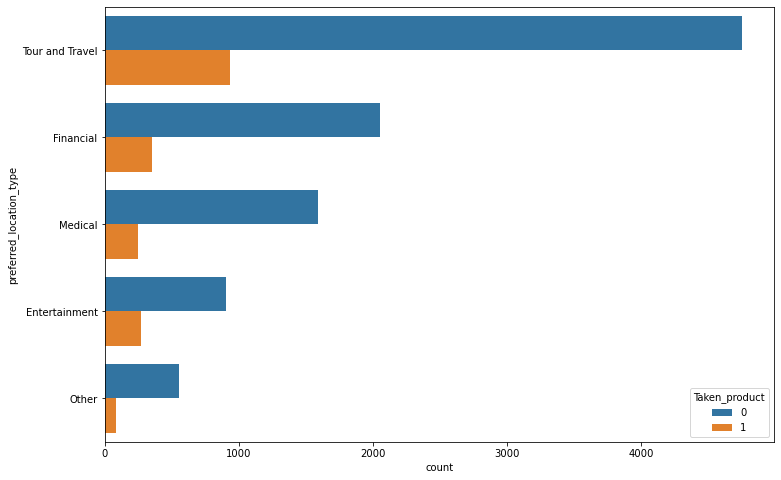

In [17]:
sns.countplot(y=social_record["preferred_location_type"],hue=social_record["Taken_product"],order = social_record["preferred_location_type"].value_counts().index)

In [18]:
category_sales(col="preferred_location_type",data=social_record,target="Taken_product")

,Taken_product,Total_sale,Market_share
preferred_location_type,,,
Entertainment,268,1173,0.228474
Financial,354,2409,0.146949
Medical,252,1845,0.136585
Other,87,643,0.135303
Tour and Travel,935,5690,0.164323


#### Following the Company Page

In [19]:
social_record["following_company_page"].unique()

array(['Yes', 'No', nan, '1', '0'], dtype=object)

In [20]:
## Cleaning the variable
social_record["following_company_page"] = social_record["following_company_page"].fillna("No")

In [21]:
social_record["following_company_page"] = social_record["following_company_page"].replace({"Yes":1,"No":0,"1":1,"0":0})

<AxesSubplot:xlabel='following_company_page', ylabel='count'>

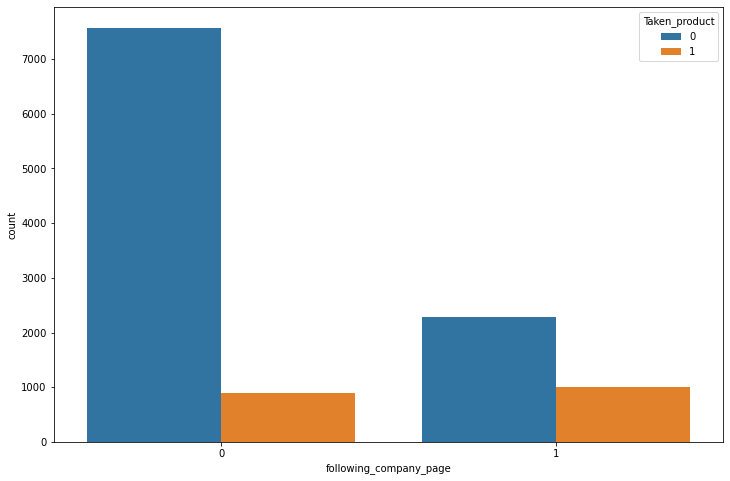

In [22]:
sns.countplot(x=social_record["following_company_page"],hue=social_record["Taken_product"])

In [23]:
social_record["following_company_page"].value_counts(normalize=True)

0    0.719643
1    0.280357
Name: following_company_page, dtype: float64

In [24]:
social_record.groupby("following_company_page").mean()["Taken_product"]

following_company_page
0    0.105164
1    0.305126
Name: Taken_product, dtype: float64

#### Working Flag

In [25]:
social_record["working_flag"].unique()

array(['No', 'Yes'], dtype=object)

In [26]:
## Encoding the variable
social_record["working_flag"] = social_record["working_flag"].replace({"Yes":1,"No":0})

<AxesSubplot:xlabel='working_flag', ylabel='count'>

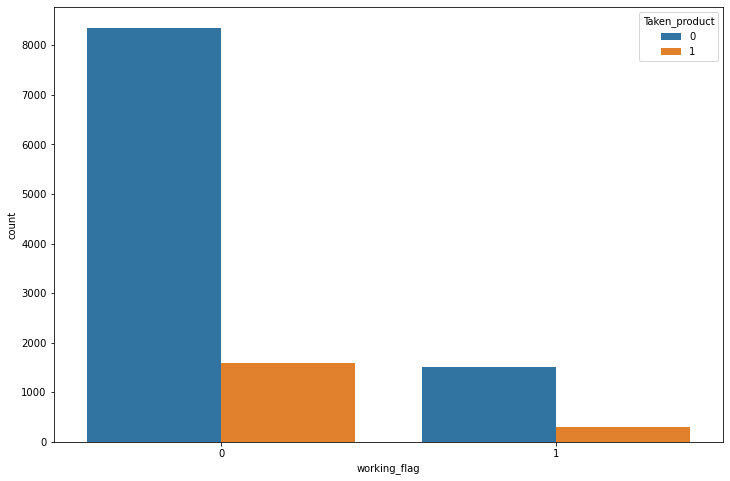

In [27]:
sns.countplot(x=social_record["working_flag"],hue=social_record["Taken_product"])

#### Travelling Network Rating

In [28]:
social_record["travelling_network_rating"].unique()

array([1, 4, 2, 3], dtype=int64)

In [29]:
### Reversing the variable
social_record["travelling_network_rating"] = social_record["travelling_network_rating"].replace({1:"highest",2:"high",3:"low",4:"poor"})

In [30]:
social_record["travelling_network_rating"] = social_record["travelling_network_rating"].replace({"poor":1,"low":2,"high":3,"highest":4})

In [31]:
social_record["travelling_network_rating"].unique()

array([4, 1, 3, 2], dtype=int64)

<AxesSubplot:xlabel='travelling_network_rating', ylabel='count'>

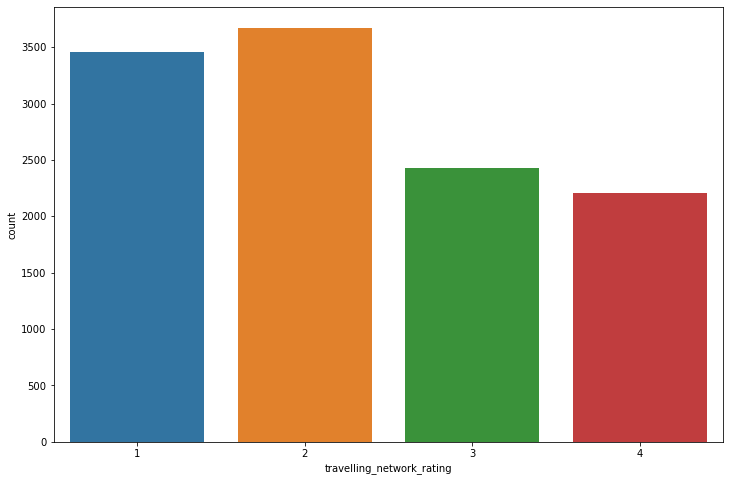

In [32]:
sns.countplot(x=social_record["travelling_network_rating"])

In [33]:
pd.crosstab(social_record["travelling_network_rating"],social_record["Taken_product"])

Taken_product,0,1
travelling_network_rating,,
1,2944,512
2,3104,568
3,2064,360
4,1752,456


In [34]:
social_record["travelling_network_rating"].value_counts()

2    3672
1    3456
3    2424
4    2208
Name: travelling_network_rating, dtype: int64

#### Adult Flag

In [35]:
social_record["Adult_flag"].unique()

array([0, 1, 3, 2], dtype=int64)

In [36]:
social_record["Adult_flag"] = social_record["Adult_flag"].replace({2:1,3:1})

<AxesSubplot:xlabel='Adult_flag', ylabel='count'>

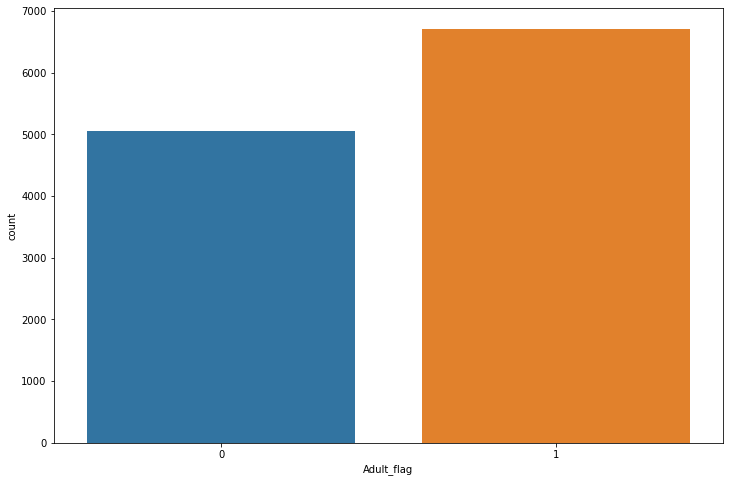

In [37]:
sns.countplot(x=social_record["Adult_flag"])

#### Week Since Last Out-of-station check-in

In [38]:
social_record["week_since_last_outstation_checkin"].unique()

array([ 8,  1,  6,  9,  0,  4,  5,  2,  7,  3, 10, 11], dtype=int64)

<AxesSubplot:xlabel='week_since_last_outstation_checkin', ylabel='count'>

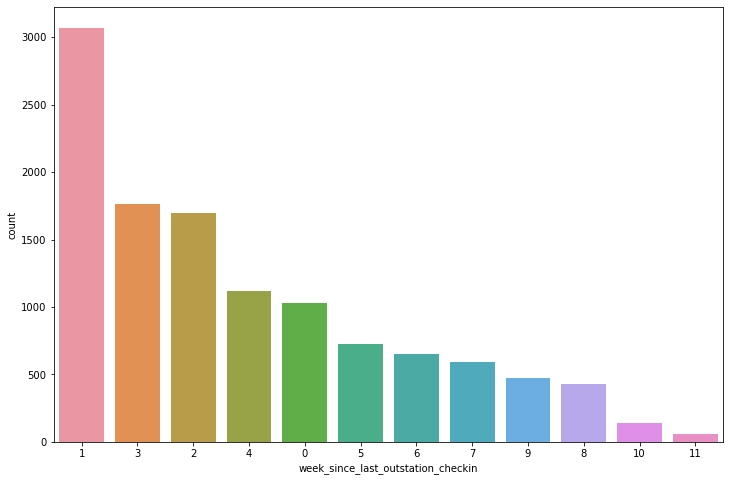

In [39]:
sns.countplot(x = social_record["week_since_last_outstation_checkin"],order = social_record["week_since_last_outstation_checkin"].value_counts().index)

#### Continous Variables

In [40]:
feature_list = ["Yearly_avg_comment_on_travel_page","total_likes_on_outofstation_checkin_received","montly_avg_comment_on_company_page","Daily_Avg_mins_spend_on_traveling_page","total_likes_on_outstation_checkin_given","Yearly_avg_view_on_travel_page"]

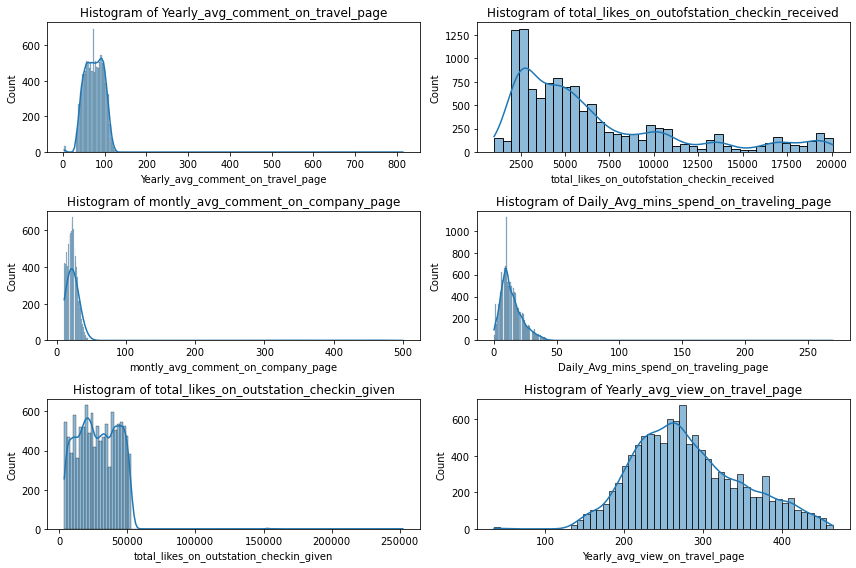

In [41]:
for i in range(len(feature_list)):
    plt.subplot(3,2,i+1)
    sns.histplot(social_record[feature_list[i]], kde = True)
    plt.title(f"Histogram of {feature_list[i]}")
    plt.tight_layout()

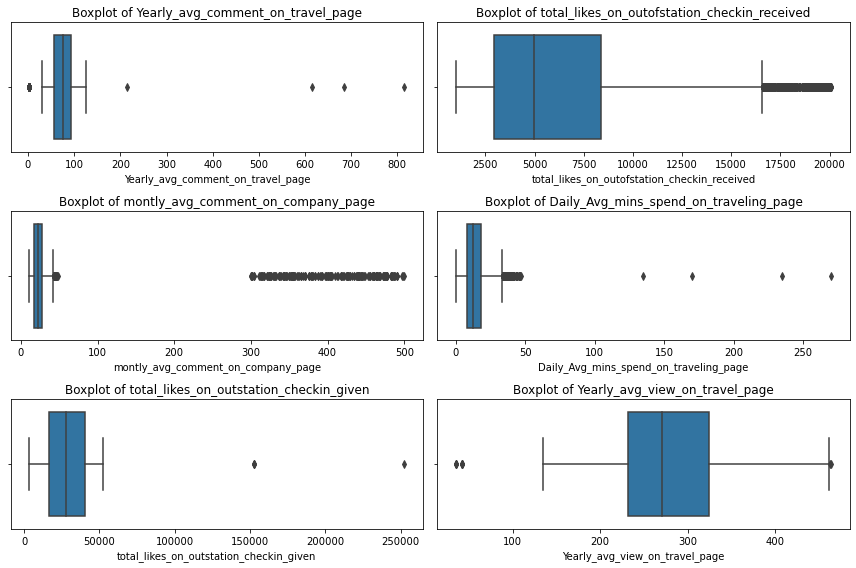

In [42]:
for i in range(len(feature_list)):
    plt.subplot(3,2,i+1)
    sns.boxplot(x=social_record[feature_list[i]])
    plt.title(f"Boxplot of {feature_list[i]}")
    plt.tight_layout()

In [43]:
social_record[feature_list].describe().T

,count,mean,std,min,25%,50%,75%,max
Yearly_avg_comment_on_travel_page,11554.0,74.790029,24.026650,3.0,57.00,75.0,92.00,815.0
total_likes_on_outofstation_checkin_received,11760.0,6531.699065,4706.613785,1009.0,2940.75,4948.0,8393.25,20065.0
montly_avg_comment_on_company_page,11760.0,28.661565,48.660504,11.0,17.00,22.0,27.00,500.0
Daily_Avg_mins_spend_on_traveling_page,11760.0,13.817432,9.070657,0.0,8.00,12.0,18.00,270.0
total_likes_on_outstation_checkin_given,11379.0,28170.481765,14385.032134,3570.0,16380.00,28076.0,40525.00,252430.0
Yearly_avg_view_on_travel_page,11179.0,280.830844,68.182958,35.0,232.00,271.0,324.00,464.0


<AxesSubplot:xlabel='Taken_product', ylabel='count'>

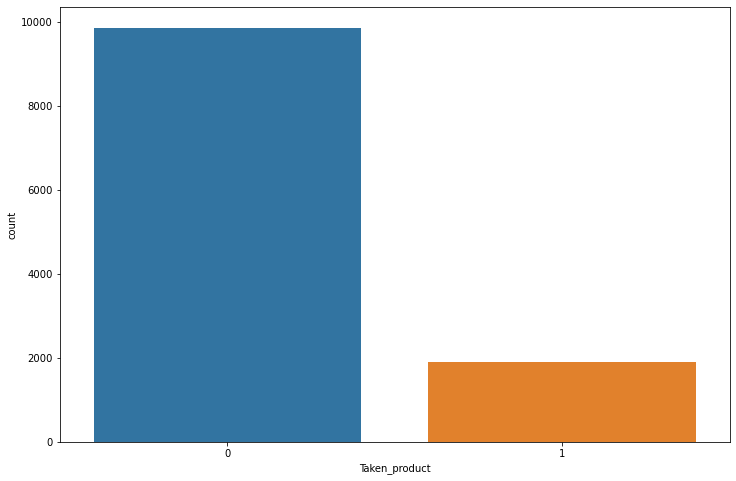

In [44]:
sns.countplot(x=social_record["Taken_product"])

In [45]:
social_record["Taken_product"].value_counts(normalize=True)

0    0.838776
1    0.161224
Name: Taken_product, dtype: float64

In [46]:
df = social_record.copy()
df= df.drop(['UserID','preferred_device'],axis=1)
df_corr = df.corr()
matrix = np.triu(df_corr,1)

<AxesSubplot:>

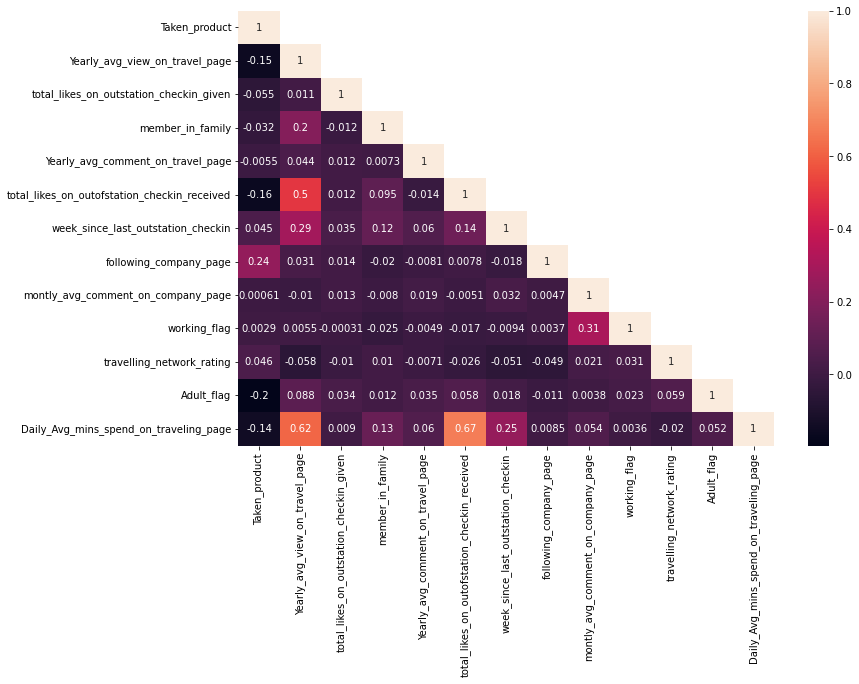

In [47]:
sns.heatmap(df_corr,annot=True,mask=matrix)

In [48]:
## Outlier Treatment
def remove_outlier(col):                                  
    Q1,Q3=col.quantile([0.25,0.75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [49]:
### Yearly_avg_view_on_travel_page
LL, UL = remove_outlier(social_record["Yearly_avg_view_on_travel_page"])
social_record["Yearly_avg_view_on_travel_page"] = np.where(social_record["Yearly_avg_view_on_travel_page"] > UL, UL, social_record["Yearly_avg_view_on_travel_page"])
social_record["Yearly_avg_view_on_travel_page"] = np.where(social_record["Yearly_avg_view_on_travel_page"]< LL, LL, social_record["Yearly_avg_view_on_travel_page"])

In [50]:
## total_likes_on_outofstation_checkin_received
LL, UL = remove_outlier(social_record["total_likes_on_outofstation_checkin_received"])
social_record["total_likes_on_outofstation_checkin_received"] = np.where(social_record["total_likes_on_outofstation_checkin_received"] > UL, UL, social_record["total_likes_on_outofstation_checkin_received"])
social_record["total_likes_on_outofstation_checkin_received"] = np.where(social_record["total_likes_on_outofstation_checkin_received"]< LL, LL, social_record["total_likes_on_outofstation_checkin_received"])

In [51]:
## Yearly_avg_comment_on_travel_page
LL, UL = remove_outlier(social_record["Yearly_avg_comment_on_travel_page"])
social_record["Yearly_avg_comment_on_travel_page"] = np.where(social_record["Yearly_avg_comment_on_travel_page"] > UL, UL, social_record["Yearly_avg_comment_on_travel_page"])
social_record["Yearly_avg_comment_on_travel_page"] = np.where(social_record["Yearly_avg_comment_on_travel_page"]< LL, LL, social_record["Yearly_avg_comment_on_travel_page"])

In [52]:
## total_likes_on_outstation_checkin_given
LL, UL = remove_outlier(social_record["total_likes_on_outstation_checkin_given"])
social_record["total_likes_on_outstation_checkin_given"] = np.where(social_record["total_likes_on_outstation_checkin_given"] > UL, UL, social_record["total_likes_on_outstation_checkin_given"])
social_record["total_likes_on_outstation_checkin_given"] = np.where(social_record["total_likes_on_outstation_checkin_given"]< LL, LL, social_record["total_likes_on_outstation_checkin_given"])

In [53]:
## montly_avg_comment_on_company_page
LL, UL = remove_outlier(social_record["montly_avg_comment_on_company_page"])
social_record["montly_avg_comment_on_company_page"] = np.where(social_record["montly_avg_comment_on_company_page"] > UL, UL, social_record["montly_avg_comment_on_company_page"])
social_record["montly_avg_comment_on_company_page"] = np.where(social_record["montly_avg_comment_on_company_page"]< LL, LL, social_record["montly_avg_comment_on_company_page"])

In [54]:
### Daily_Avg_mins_spend_on_traveling_page
LL, UL = remove_outlier(social_record["Daily_Avg_mins_spend_on_traveling_page"])
social_record["Daily_Avg_mins_spend_on_traveling_page"] = np.where(social_record["Daily_Avg_mins_spend_on_traveling_page"] > UL, UL, social_record["Daily_Avg_mins_spend_on_traveling_page"])
social_record["Daily_Avg_mins_spend_on_traveling_page"] = np.where(social_record["Daily_Avg_mins_spend_on_traveling_page"]< LL, LL, social_record["Daily_Avg_mins_spend_on_traveling_page"])

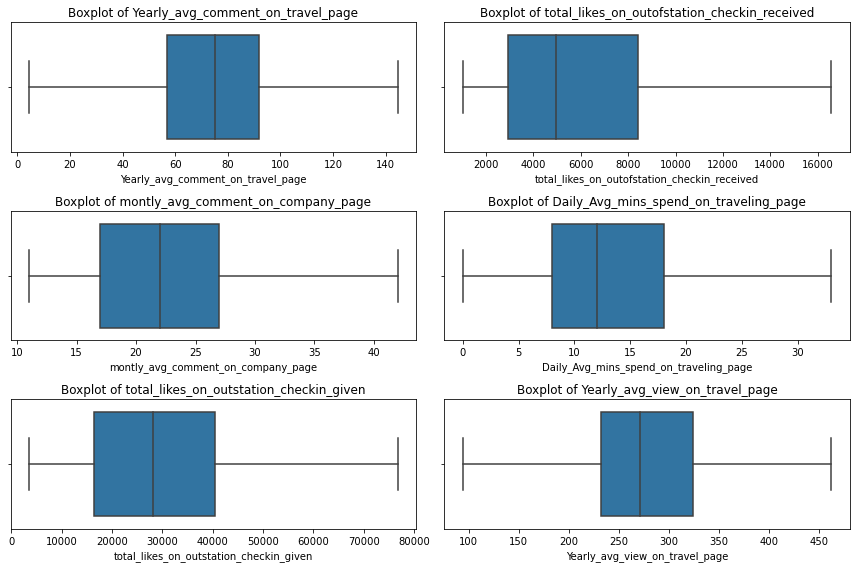

In [55]:
for i in range(len(feature_list)):
    plt.subplot(3,2,i+1)
    sns.boxplot(x=social_record[feature_list[i]])
    plt.title(f"Boxplot of {feature_list[i]}")
    plt.tight_layout()

In [56]:
social_record["yearly_avg_Outstation_checkins"].unique()

array(['1', '24', '23', '27', '16', '15', '26', '19', '21', '11', '10',
       '25', '12', '18', '29', nan, '22', '14', '20', '28', '17', '13',
       '*', '5', '8', '2', '3', '9', '7', '6', '4'], dtype=object)

In [57]:
social_record["Yearly_avg_view_on_travel_page"] = social_record["Yearly_avg_view_on_travel_page"].fillna(271)

In [58]:
social_record["yearly_avg_Outstation_checkins"] = social_record["yearly_avg_Outstation_checkins"].fillna(1)

In [59]:
social_record["yearly_avg_Outstation_checkins"] = social_record["yearly_avg_Outstation_checkins"].replace("*",1)

In [60]:
social_record["yearly_avg_Outstation_checkins"] = social_record["yearly_avg_Outstation_checkins"].astype("int")

In [61]:
social_record["preferred_device"] = social_record["preferred_device"].fillna("Mobile")

In [62]:
dict_preferred = social_record["preferred_location_type"].value_counts().to_dict()
dict_preferred

{'Tour and Travel': 5690,
 'Financial': 2409,
 'Medical': 1845,
 'Entertainment': 1173,
 'Other': 643}

In [63]:
social_record["preferred_location_type"] = social_record["preferred_location_type"].replace(dict_preferred)

In [64]:
social_record["total_likes_on_outstation_checkin_given"].median()

28076.0

In [65]:
social_record["total_likes_on_outstation_checkin_given"] = social_record["total_likes_on_outstation_checkin_given"].fillna(28076)

In [66]:
social_record["Yearly_avg_comment_on_travel_page"].median()

75.0

In [67]:
social_record["Yearly_avg_comment_on_travel_page"] = social_record["Yearly_avg_comment_on_travel_page"].fillna(75)

In [68]:
social_record.isnull().sum()

UserID                                          0
Taken_product                                   0
Yearly_avg_view_on_travel_page                  0
preferred_device                                0
total_likes_on_outstation_checkin_given         0
yearly_avg_Outstation_checkins                  0
member_in_family                                0
preferred_location_type                         0
Yearly_avg_comment_on_travel_page               0
total_likes_on_outofstation_checkin_received    0
week_since_last_outstation_checkin              0
following_company_page                          0
montly_avg_comment_on_company_page              0
working_flag                                    0
travelling_network_rating                       0
Adult_flag                                      0
Daily_Avg_mins_spend_on_traveling_page          0
dtype: int64

In [69]:
social_record.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11760 entries, 0 to 11759
Data columns (total 17 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   UserID                                        11760 non-null  int64  
 1   Taken_product                                 11760 non-null  int64  
 2   Yearly_avg_view_on_travel_page                11760 non-null  float64
 3   preferred_device                              11760 non-null  object 
 4   total_likes_on_outstation_checkin_given       11760 non-null  float64
 5   yearly_avg_Outstation_checkins                11760 non-null  int32  
 6   member_in_family                              11760 non-null  int32  
 7   preferred_location_type                       11760 non-null  int64  
 8   Yearly_avg_comment_on_travel_page             11760 non-null  float64
 9   total_likes_on_outofstation_checkin_received  11760 non-null 

In [70]:
social_record["preferred_device"].unique()

array(['iOS and Android', 'iOS', 'ANDROID', 'Mobile', 'Android',
       'Android OS', 'Other', 'Others', 'Tab', 'Laptop'], dtype=object)

In [71]:
for i in social_record["preferred_device"]:
    if i == "Laptop":
        pass
    else:
        social_record["preferred_device"] = social_record["preferred_device"].replace({i:"Mobile"})

In [72]:
mobile_user = social_record[social_record["preferred_device"] == "Mobile"]

In [73]:
Laptop_user = social_record[social_record["preferred_device"]=="Laptop"]

In [74]:
mobile_user.to_csv("mobile_user.csv",header=mobile_user.columns)

In [75]:
Laptop_user.to_csv("Laptop_user.csv",header=Laptop_user.columns)

In [76]:
mobile_user = pd.read_csv("mobile_user.csv")

In [77]:
mobile_user.head()

,Unnamed: 0,UserID,Taken_product,Yearly_avg_view_on_travel_page,preferred_device,total_likes_on_outstation_checkin_given,yearly_avg_Outstation_checkins,member_in_family,preferred_location_type,Yearly_avg_comment_on_travel_page,total_likes_on_outofstation_checkin_received,week_since_last_outstation_checkin,following_company_page,montly_avg_comment_on_company_page,working_flag,travelling_network_rating,Adult_flag,Daily_Avg_mins_spend_on_traveling_page
0,0,1000001,1,307.0,Mobile,38570.0,1,2,2409,94.0,5993.0,8,1,11.0,0,4,0,8.0
1,1,1000002,0,367.0,Mobile,9765.0,1,1,2409,61.0,5130.0,1,0,23.0,1,1,1,10.0
2,2,1000003,1,277.0,Mobile,48055.0,1,2,643,92.0,2090.0,6,1,15.0,0,3,0,7.0
3,3,1000004,0,247.0,Mobile,48720.0,1,4,2409,56.0,2909.0,1,1,11.0,0,2,0,8.0
4,4,1000005,0,202.0,Mobile,20685.0,1,1,1845,40.0,3468.0,9,0,12.0,0,1,1,6.0


In [78]:
laptop_user = pd.read_csv("Laptop_user.csv")

In [79]:
laptop_user.head()

,Unnamed: 0,UserID,Taken_product,Yearly_avg_view_on_travel_page,preferred_device,total_likes_on_outstation_checkin_given,yearly_avg_Outstation_checkins,member_in_family,preferred_location_type,Yearly_avg_comment_on_travel_page,total_likes_on_outofstation_checkin_received,week_since_last_outstation_checkin,following_company_page,montly_avg_comment_on_company_page,working_flag,travelling_network_rating,Adult_flag,Daily_Avg_mins_spend_on_traveling_page
0,5881,1005882,0,379.0,Laptop,9776.0,8,1,5690,64.0,5142.0,1,0,33.0,1,1,1,10.0
1,5883,1005884,0,255.0,Laptop,48725.0,3,4,5690,59.0,2913.0,1,1,19.0,0,2,0,8.0
2,5885,1005886,0,250.0,Laptop,35184.0,2,2,5690,84.0,3074.0,0,0,23.0,0,2,0,8.0
3,5888,1005889,0,295.0,Laptop,7572.0,23,3,5690,48.0,9532.0,0,0,33.0,1,3,0,10.0
4,5906,1005907,1,250.0,Laptop,39379.0,16,1,5690,80.0,3926.0,1,1,33.0,1,3,0,10.0


## Model Building

In [80]:
mobile_user.drop(["Unnamed: 0","UserID","preferred_device"],axis=1,inplace=True)

In [81]:
laptop_user.drop(["Unnamed: 0","UserID","preferred_device"],axis=1,inplace=True)

In [82]:
from sklearn.model_selection import train_test_split

In [83]:
### Splitting Mobile data

In [84]:
x = mobile_user.drop("Taken_product",axis=1)
y = mobile_user.pop("Taken_product")

In [85]:
x_train_mobile,x_test_mobile,y_train_mobile,y_test_mobile = train_test_split(x,y,test_size=0.3,random_state=4)

In [86]:
### Splitting Laptop data

In [87]:
x_laptop = laptop_user.drop("Taken_product",axis=1)
y_laptop = laptop_user.pop("Taken_product")

In [88]:
x_train_laptop,x_test_laptop,y_train_laptop,y_test_laptop = train_test_split(x_laptop,y_laptop,test_size=0.3,random_state=4)

In [89]:
y_train_laptop.shape

(775,)

### Random Forest Classifier

In [90]:
## Random forest is the most commonly used model for binary classification. 
##The popularity of random forest is mainly because of less number of assumption and is not affected by outliers.

from sklearn.ensemble import RandomForestClassifier

In [91]:
from sklearn.metrics import confusion_matrix, classification_report

#### Mobile

In [92]:
RF_mobile = RandomForestClassifier()
model_mobile = RF_mobile.fit(x_train_mobile,y_train_mobile)

In [93]:
y_pred_test_mob = model_mobile.predict(x_test_mobile)

<AxesSubplot:>

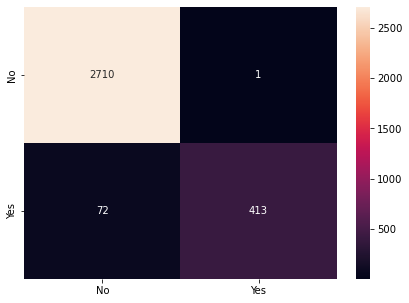

In [94]:
cm=confusion_matrix(y_test_mobile, y_pred_test_mob, labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

In [95]:
print(classification_report(y_test_mobile, y_pred_test_mob))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99      2711
           1       1.00      0.85      0.92       485

    accuracy                           0.98      3196
   macro avg       0.99      0.93      0.95      3196
weighted avg       0.98      0.98      0.98      3196



#### Laptop

In [96]:
RF_laptop = RandomForestClassifier()
model_laptop = RF_laptop.fit(x_train_laptop,y_train_laptop)

In [97]:
y_pred_test_laptop = model_laptop.predict(x_test_laptop)

<AxesSubplot:>

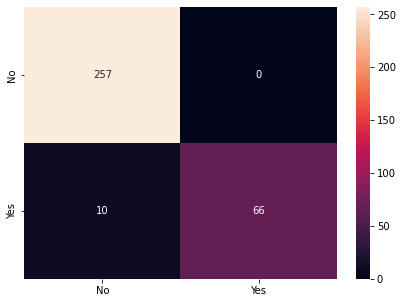

In [98]:
cm=confusion_matrix(y_test_laptop, y_pred_test_laptop, labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

In [99]:
print(classification_report(y_test_laptop, y_pred_test_laptop))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       257
           1       1.00      0.87      0.93        76

    accuracy                           0.97       333
   macro avg       0.98      0.93      0.96       333
weighted avg       0.97      0.97      0.97       333



### Naive Bayes

In [100]:
from sklearn.naive_bayes import GaussianNB

In [101]:
naive_bayes = GaussianNB()

#### Mobile

In [102]:
model_mobile = naive_bayes.fit(x_train_mobile,y_train_mobile)

In [103]:
y_pred_test_mob = model_mobile.predict(x_test_mobile)

<AxesSubplot:>

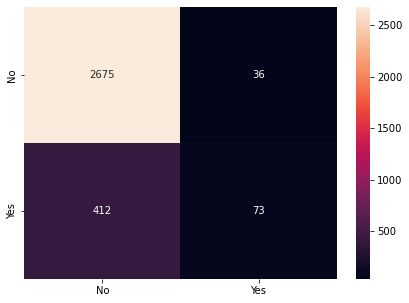

In [104]:
cm=confusion_matrix(y_test_mobile, y_pred_test_mob, labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

In [105]:
print(classification_report(y_test_mobile, y_pred_test_mob))

              precision    recall  f1-score   support

           0       0.87      0.99      0.92      2711
           1       0.67      0.15      0.25       485

    accuracy                           0.86      3196
   macro avg       0.77      0.57      0.58      3196
weighted avg       0.84      0.86      0.82      3196



#### Laptop

In [106]:
model_laptop = naive_bayes.fit(x_train_laptop,y_train_laptop)

In [107]:
y_pred_test_laptop = model_laptop.predict(x_test_laptop)

<AxesSubplot:>

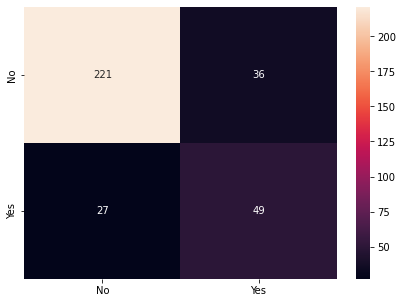

In [108]:
cm=confusion_matrix(y_test_laptop, y_pred_test_laptop, labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

In [109]:
print(classification_report(y_test_laptop, y_pred_test_laptop))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88       257
           1       0.58      0.64      0.61        76

    accuracy                           0.81       333
   macro avg       0.73      0.75      0.74       333
weighted avg       0.82      0.81      0.81       333



### K-Nearest Neighbour

In [110]:
from sklearn.neighbors import KNeighborsClassifier

In [111]:
from sklearn.preprocessing import StandardScaler

#### Mobile

In [112]:
scaler = StandardScaler()
x_train_mobile_scaled = scaler.fit_transform(x_train_mobile)
x_test_mobile_scaled = scaler.fit_transform(x_test_mobile) 

In [113]:
KNN = KNeighborsClassifier(n_neighbors = 2)
model_mobile = KNN.fit(x_train_mobile_scaled,y_train_mobile)

In [114]:
y_pred_test_mob = model_mobile.predict(x_test_mobile_scaled)

<AxesSubplot:>

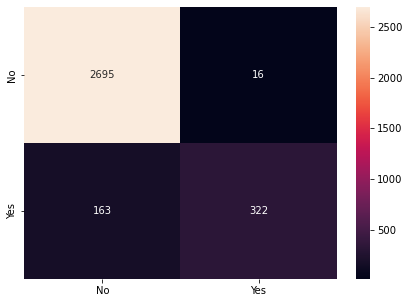

In [115]:
cm=confusion_matrix(y_test_mobile, y_pred_test_mob, labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

In [116]:
print(classification_report(y_test_mobile, y_pred_test_mob))

              precision    recall  f1-score   support

           0       0.94      0.99      0.97      2711
           1       0.95      0.66      0.78       485

    accuracy                           0.94      3196
   macro avg       0.95      0.83      0.88      3196
weighted avg       0.94      0.94      0.94      3196



#### laptop

In [117]:
scaler = StandardScaler()
x_train_laptop_scaled = scaler.fit_transform(x_train_laptop)
x_test_laptop_scaled = scaler.fit_transform(x_test_laptop)

In [118]:
model_laptop = KNN.fit(x_train_laptop_scaled,y_train_laptop)

In [119]:
y_pred_test_laptop = model_laptop.predict(x_test_laptop_scaled)

<AxesSubplot:>

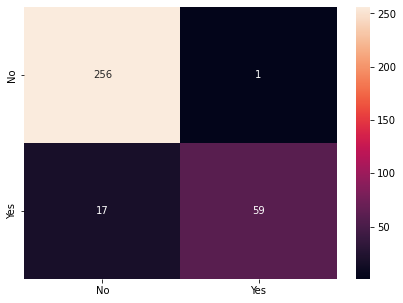

In [120]:
cm=confusion_matrix(y_test_laptop, y_pred_test_laptop, labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

In [121]:
print(classification_report(y_test_laptop, y_pred_test_laptop))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97       257
           1       0.98      0.78      0.87        76

    accuracy                           0.95       333
   macro avg       0.96      0.89      0.92       333
weighted avg       0.95      0.95      0.94       333



In [123]:
scores = []
for k in range(1,50):
    KNN = KNeighborsClassifier(n_neighbors = k)
    KNN_model = KNN.fit(x_train_mobile_scaled,y_train_mobile)
    scores.append(KNN_model.score(x_test_mobile_scaled,y_test_mobile))  ### Finding the best K value

Text(0, 0.5, 'Accuracy score')

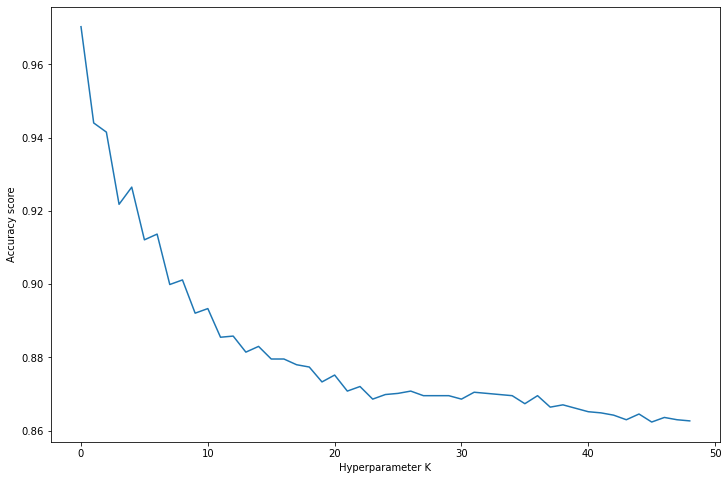

In [124]:
plt.figure(figsize=(12,8))
plt.plot(scores)
plt.xlabel("Hyperparameter K")
plt.ylabel("Accuracy score")

### Logistic Regression

In [125]:
from sklearn.linear_model import LogisticRegression

In [126]:
LR = LogisticRegression()

#### Mobile

In [127]:
model_mobile = LR.fit(x_train_mobile_scaled,y_train_mobile)

In [128]:
y_pred_test_mob = model_mobile.predict(x_test_mobile_scaled)

<AxesSubplot:>

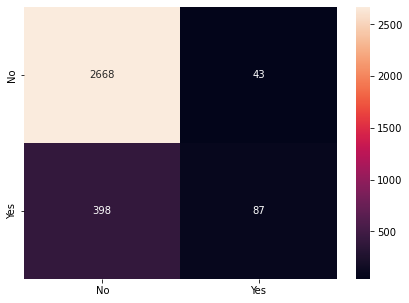

In [129]:
cm=confusion_matrix(y_test_mobile, y_pred_test_mob, labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

In [130]:
print(classification_report(y_test_mobile, y_pred_test_mob))

              precision    recall  f1-score   support

           0       0.87      0.98      0.92      2711
           1       0.67      0.18      0.28       485

    accuracy                           0.86      3196
   macro avg       0.77      0.58      0.60      3196
weighted avg       0.84      0.86      0.83      3196



#### Laptop

In [131]:
model_laptop = LR.fit(x_train_laptop_scaled,y_train_laptop)

In [132]:
y_pred_test_laptop = model_laptop.predict(x_test_laptop_scaled)

<AxesSubplot:>

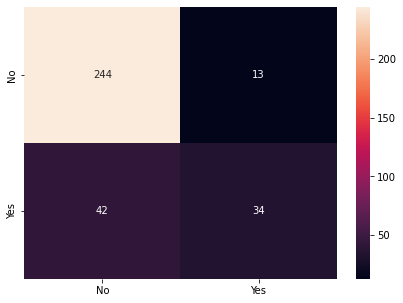

In [133]:
cm=confusion_matrix(y_test_laptop, y_pred_test_laptop, labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

In [134]:
print(classification_report(y_test_laptop, y_pred_test_laptop))

              precision    recall  f1-score   support

           0       0.85      0.95      0.90       257
           1       0.72      0.45      0.55        76

    accuracy                           0.83       333
   macro avg       0.79      0.70      0.73       333
weighted avg       0.82      0.83      0.82       333



## End